# Introduction to Time Series

## Stationarity and Differencing

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

#### Which of these are stationary?

![](https://otexts.org/fpp2/fpp_files/figure-html/stationary-1.png)

At first glance, the strong cycles in series (g) might appear to make it non-stationary. But these cycles are aperiodic — they are caused when the lynx population becomes too large for the available feed, so that they stop breeding and the population falls to very low numbers, then the regeneration of their food sources allows the population to grow again, and so on. In the long-term, the timing of these cycles is not predictable. Hence the series is stationary.

## Differencing

Note that the Google stock price was non-stationary in panel (a), but the daily changes were stationary in panel (b). This shows one way to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as **differencing**.

Transformations such as logarithms can help to stabilize the variance of a time series. Differencing can help stabilize the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

> Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!   (Recall our famous forecasting quotes.)  The predictions for the stationarized series can then be "untransformed," by reversing whatever mathematical transformations were previously used, to obtain predictions for the original series. (The details are normally taken care of by your software.) Thus, finding the sequence of transformations needed to stationarize a time series often provides important clues in the search for an appropriate forecasting model.  Stationarizing a time series through differencing (where needed) is an important part of the process of fitting an ARIMA model, as discussed in the ARIMA pages of these notes.

> Another reason for trying to stationarize a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables. For this reason you should be cautious about trying to extrapolate regression models fitted to nonstationary data.

http://people.duke.edu/~rnau/411diff.htm

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

bike_sharing_df.set_index('dteday', inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
bike_sharing_df['cnt_diff_1'] = bike_sharing_df.cnt.diff(1)

In [18]:
cnt_cols = [col for col in bike_sharing_df.columns if 'cnt' in col]

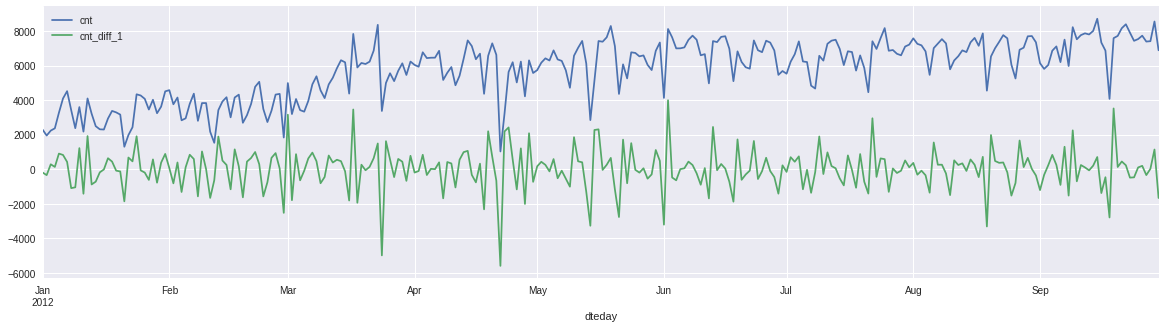

In [19]:
bike_sharing_df['01/2012':'09/2012'][cnt_cols].plot(figsize=(20,5))

In [20]:
bike_sharing_df['cnt_diff_365'] = bike_sharing_df.cnt.diff(365)

In [21]:
cnt_cols = [col for col in bike_sharing_df.columns if 'cnt' in col]

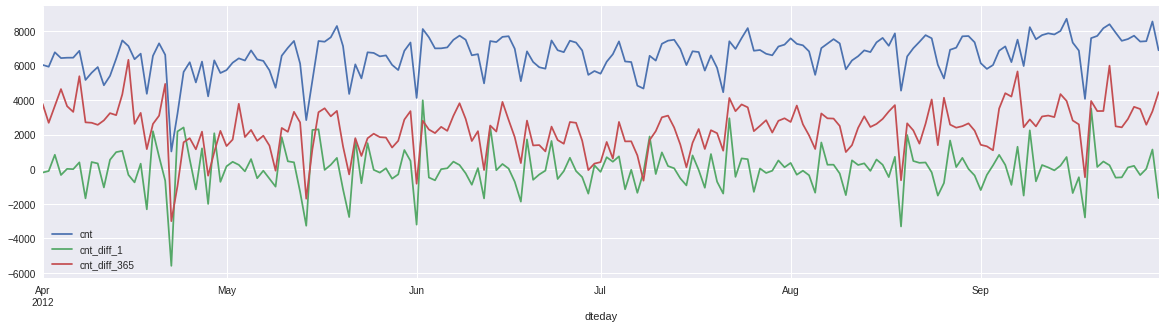

In [22]:
bike_sharing_df['04/2012':'09/2012'][cnt_cols].plot(figsize=(20,5))

## Checks For Stationarity

In [23]:
rental_count = bike_sharing_df.cnt
rental_count_2011 = bike_sharing_df['2011'].cnt
rental_count_2012 = bike_sharing_df['2012'].cnt

In [24]:
rental_count_2011.mean(), rental_count_2012.mean()

(3405.7616438356163, 5599.934426229508)

In [25]:
rental_count_2011.var(), rental_count_2012.var()

(1900961.6710522354, 3199332.7408937793)

This shows us that rental count is non-stationary.

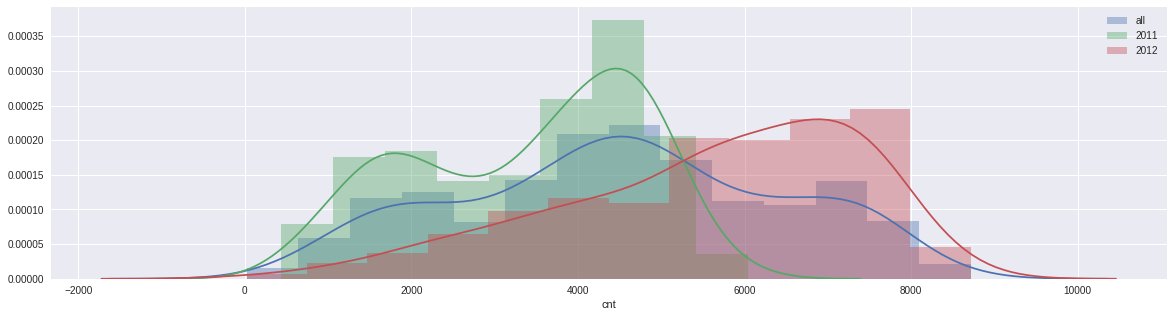

In [26]:
plt.figure(figsize=(20,5))
sns.distplot(rental_count, label='all')
sns.distplot(rental_count_2011, label='2011')
sns.distplot(rental_count_2012, label='2012')
plt.legend()

### Unit Root Test

The [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test) is a type of statistical test called a [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

- **Null Hypothesis (H0)**: If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.



In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(rental_count)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.877448
p-value: 0.342743


In [28]:
bike_sharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'cnt_diff_1', 'cnt_diff_365'],
      dtype='object')

In [29]:
result = adfuller(bike_sharing_df['cnt_diff_1'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.778809
p-value: 0.000000
